아래와 같이 텍스트 파일을 읽어 옵니다.

In [1]:
import numpy as np
from os import listdir
from os.path import isfile, join

mypath = './example_En_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [2]:
import preprocessing # import a python file for English text preprocessing

In [3]:
stopwords = ['be', 'today', 'yesterday', 'tomorrow'] # 불용어 사전 생성하기

In [4]:
docs_nouns = [preprocessing.En_preprocessing(doc, stopwords) for doc in total_docs]

In [5]:
documents_filtered = [' '.join(doc) for doc in docs_nouns]
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [8]:
vectorizer = TfidfVectorizer()
DTM_tfidf = vectorizer.fit_transform(documents_filtered) # 문서들을 TFIDF matrix로 변환

In [9]:
DTM_TFIDF = np.array(DTM_tfidf.todense())

## DBSCAN

In [10]:
# get distance with nearest neighbor
def nearest_dist(a):
    """
    각 벡터에 대해서 가장 가까운 벡터와의 유클리디안 거리 정보가 
    저장된 리스트가 반환됩니다.
    """
    norms = []
    for i in range(len(a)):
        temp_norms = []
        for j in range(len(a)):
            if i != j:
                norm = np.linalg.norm(a[i]-a[j])
                temp_norms.append(norm)
        norms.append(min(temp_norms))
    return norms 

In [11]:
short_distances = nearest_dist(DTM_TFIDF)
print(short_distances)

[1.0856160376767328, 1.0856160376767328, 1.150775183179138, 0.9907573190025211, 0.9907573190025211, 0.855206166281706, 0.9549035416762576, 0.855206166281706, 0.7834671664041746, 1.142335082649629, 0.9976940094654648, 0.7834671664041746, 0.93719962181223, 0.9638313983559299, 0.93719962181223]


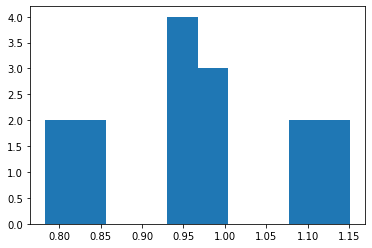

In [12]:
import matplotlib.pyplot as plt

plt.hist(short_distances)
plt.show()

In [13]:
mean_dis = np.array(short_distances).mean()
print(mean_dis)

0.9676021225120764


In [14]:
max_dis = np.array(short_distances).max()
print(max_dis)

1.150775183179138


In [15]:
from sklearn.cluster import DBSCAN

# max_dis를 이용한 경우
dbscan1 = DBSCAN(eps=max_dis+0.01, min_samples=3)
clustering_DBS_max = dbscan1.fit_predict(DTM_TFIDF)
clustering_DBS_max

array([ 0,  0,  0, -1, -1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3],
      dtype=int64)

In [17]:
# mean_dis를 이용한 경우
dbscan2 = DBSCAN(eps=mean_dis+0.01, min_samples=3)
clustering_DBS_mean = dbscan2.fit_predict(DTM_TFIDF)
clustering_DBS_mean

array([-1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1],
      dtype=int64)

In [18]:
DTM_TFIDF.shape

(15, 1166)

In [23]:
for minpts in range(1, 6):
    dbscan = DBSCAN(eps=max_dis+0.01, min_samples=minpts)
    print("minpts = {}: {}".format(minpts, dbscan.fit_predict(DTM_TFIDF)))

minpts = 2: [0 0 0 1 1 2 2 2 3 3 3 3 4 4 4]
minpts = 3: [ 0  0  0 -1 -1  1  1  1  2  2  2  2  3  3  3]
minpts = 4: [-1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1 -1]
minpts = 5: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
